<a href="https://colab.research.google.com/github/ridhampatel14/ML_projects/blob/main/Na%C3%AFve_Bayes_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Naive Bayes classifier**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [6]:
df.shape

(891, 5)

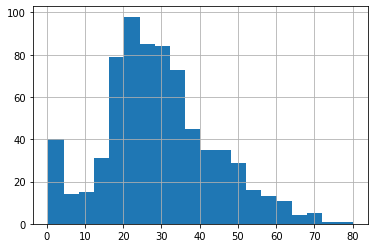

In [7]:
df.Age.hist(bins=20)

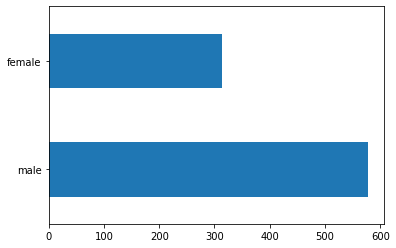

In [8]:
df.Sex.value_counts().plot(kind='barh')

In [9]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [10]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [11]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [12]:
inputs.drop(['Sex','male'],axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1


In [13]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [14]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [15]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [17]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [18]:
model.fit(X_train,y_train)

GaussianNB()

In [19]:
model.score(X_test,y_test)

0.7932960893854749

In [20]:
#X_test[0:10]
X_test

,Pclass,Age,Fare,female
868,3,29.699118,9.5000,0
382,3,32.000000,7.9250,0
296,3,23.500000,7.2292,0
439,2,31.000000,10.5000,0
846,3,29.699118,69.5500,0
...,...,...,...,...
80,3,22.000000,9.0000,0
311,1,18.000000,262.3750,1
428,3,29.699118,7.7500,0
222,3,51.000000,8.0500,0


In [21]:
y_test

868    0
382    0
296    0
439    0
846    0
      ..
80     0
311    1
428    0
222    0
394    1
Name: Survived, Length: 179, dtype: int64

In [22]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1])

In [23]:
model.predict_proba(X_test[:10])

array([[0.96240053, 0.03759947],
       [0.96334298, 0.03665702],
       [0.95759371, 0.04240629],
       [0.92496376, 0.07503624],
       [0.90775572, 0.09224428],
       [0.2262918 , 0.7737082 ],
       [0.95501846, 0.04498154],
       [0.38171411, 0.61828589],
       [0.9622679 , 0.0377321 ],
       [0.95494604, 0.04505396]])

In [24]:
print(model.predict(X_test)[:10])
print(y_train[:10])

[0 0 0 0 0 1 0 1 0 0]
42     0
170    0
782    0
127    1
503    0
661    0
798    0
654    0
259    1
809    1
Name: Survived, dtype: int64


In [25]:
from sklearn.metrics import precision_score
#(true value , predicted value)
precision_score(y_test,model.predict(X_test))

0.7894736842105263

In [26]:
from sklearn.metrics import recall_score
recall_score(y_test,model.predict(X_test))

0.7407407407407407

In [27]:
from sklearn.metrics import f1_score
f1_score(y_test,model.predict(X_test))

0.7643312101910827

In [28]:
from sklearn import metrics
metrics.confusion_matrix(y_test,model.predict(X_test))

array([[82, 16],
       [21, 60]])

In [29]:
std_arr=[]
var_arr=[]
score_arr=[]
precision_score_arr=[]
recall_score_arr=[]
f1_score_arr=[]
error_arr=[]
for i in range(20):
  X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2,random_state = None)
  model.fit(X_train,y_train)
  y_predicted=model.predict(X_test)
  std_arr.append(y_predicted.std())
  var_arr.append(y_predicted.var())
  score_arr.append(model.score(X_test,y_test))
  precision_score_arr.append(precision_score(y_test,y_predicted))
  recall_score_arr.append(recall_score(y_test,y_predicted))
  f1_score_arr.append(f1_score(y_test,y_predicted))
  error_arr.append(1-(model.score(X_test,y_test)))



In [30]:
analyze_df=pd.DataFrame(list(zip(std_arr,var_arr,score_arr,precision_score_arr,recall_score_arr,f1_score_arr,error_arr)),columns=['std','var','accuracy','precision_score','recall_score','f1_score','error'])
analyze_df

,std,var,accuracy,precision_score,recall_score,f1_score,error
0,0.473972,0.224650,0.782123,0.639344,0.696429,0.666667,0.217877
1,0.487988,0.238132,0.754190,0.700000,0.680556,0.690141,0.245810
2,0.490349,0.240442,0.793296,0.722222,0.753623,0.737589,0.206704
3,0.475812,0.226397,0.765363,0.661290,0.661290,0.661290,0.234637
4,0.479276,0.229706,0.837989,0.765625,0.777778,0.771654,0.162011
5,0.486707,0.236884,0.754190,0.753623,0.658228,0.702703,0.245810
6,0.495855,0.245872,0.748603,0.628205,0.753846,0.685315,0.251397
7,0.480901,0.231266,0.770950,0.676923,0.687500,0.682171,0.229050
8,0.499055,0.249056,0.832402,0.761905,0.864865,0.810127,0.167598
9,0.494279,0.244312,0.748603,0.697368,0.706667,0.701987,0.251397


In [31]:
an_df=analyze_df.describe()
an_df

,std,var,accuracy,precision_score,recall_score,f1_score,error
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.487030,0.237246,0.775978,0.696967,0.722023,0.707789,0.224022
std,0.007108,0.006910,0.028191,0.055154,0.048669,0.040083,0.028191
min,0.473972,0.224650,0.737430,0.623188,0.658228,0.656934,0.162011
25%,0.483182,0.233466,0.752793,0.648967,0.685764,0.679597,0.205307
50%,0.487348,0.237508,0.770950,0.698684,0.717619,0.702345,0.229050
75%,0.491331,0.241409,0.794693,0.754503,0.747728,0.732905,0.247207
max,0.499055,0.249056,0.837989,0.790323,0.864865,0.810127,0.262570


In [32]:
mean=an_df.loc['mean']
max=an_df.loc['max']
min=an_df.loc['min']
analyze_df.loc['mean']=mean
analyze_df.loc['max']=max
analyze_df.loc['min']=min
analyze_df

,std,var,accuracy,precision_score,recall_score,f1_score,error
0,0.473972,0.224650,0.782123,0.639344,0.696429,0.666667,0.217877
1,0.487988,0.238132,0.754190,0.700000,0.680556,0.690141,0.245810
2,0.490349,0.240442,0.793296,0.722222,0.753623,0.737589,0.206704
3,0.475812,0.226397,0.765363,0.661290,0.661290,0.661290,0.234637
4,0.479276,0.229706,0.837989,0.765625,0.777778,0.771654,0.162011
5,0.486707,0.236884,0.754190,0.753623,0.658228,0.702703,0.245810
6,0.495855,0.245872,0.748603,0.628205,0.753846,0.685315,0.251397
7,0.480901,0.231266,0.770950,0.676923,0.687500,0.682171,0.229050
8,0.499055,0.249056,0.832402,0.761905,0.864865,0.810127,0.167598
9,0.494279,0.244312,0.748603,0.697368,0.706667,0.701987,0.251397


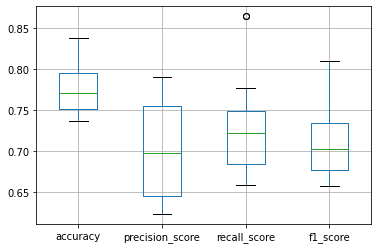

In [33]:
analyze_df[['accuracy','precision_score','recall_score','f1_score',]].boxplot()

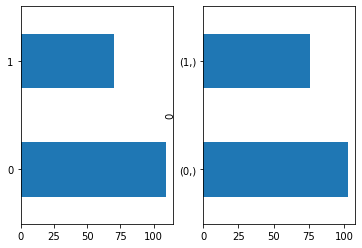

In [34]:
plt.subplot(1, 2, 1)
y_test.value_counts().plot(kind='barh')
plt.subplot(1, 2, 2)
y_pred_df=pd.DataFrame(y_pred)
y_pred_df.value_counts().plot(kind='barh')